# **Importing libraries and Exploring the Dataset**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#A function to calculate null %
def get_null_percentages(df):
  null_counts = df.isnull().sum()
  total_counts = len(df)
  #avoid division by zero for empty DataFrames
  if total_counts == 0:
    return pd.Series(0, index=df.columns)
  return (null_counts / total_counts) * 100

In [ ]:
doctors=pd.read_csv('/content/doctors.csv')

In [ ]:
doctors.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,76.79,0.75,24.0


There are some missing values '--'

In [ ]:
doctors.loc[doctors.Satisfaction == '--', 'Satisfaction'] = np.nan

In [ ]:
doctors.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,NaN,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,NaN,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,76.79,0.75,24.0


In [ ]:
doctors.shape

(437, 9)

In [ ]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DoctorID        437 non-null    object 
 1   Region          437 non-null    object 
 2   Category        437 non-null    object 
 3   Rank            435 non-null    object 
 4   Incidence rate  437 non-null    float64
 5   R rate          437 non-null    float64
 6   Satisfaction    250 non-null    object 
 7   Experience      437 non-null    float64
 8   Purchases       437 non-null    float64
dtypes: float64(4), object(5)
memory usage: 30.9+ KB


In [ ]:
doctors.isnull().sum()

DoctorID            0
Region              0
Category            0
Rank                2
Incidence rate      0
R rate              0
Satisfaction      187
Experience          0
Purchases           0
dtype: int64

In [ ]:
null_percentages_doctors = get_null_percentages(doctors.copy())
print("Percentage of null values in each column for doctors: (%)")
print(null_percentages_doctors.to_string())

Percentage of null values in each column for doctors: (%)
DoctorID           0.000000
Region             0.000000
Category           0.000000
Rank               0.457666
Incidence rate     0.000000
R rate             0.000000
Satisfaction      42.791762
Experience         0.000000
Purchases          0.000000


In [ ]:
instructions=pd.read_csv('/content/instructions.csv')

In [ ]:
instructions.head()

,DoctorID,Instructions
0,ADIFBD,Yes
1,ABHBED,No
2,FJFEG,Yes
3,AEBDAB,No
4,AJCBFE,Yes


In [ ]:
instructions.shape

(77, 2)

In [ ]:
instructions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DoctorID      77 non-null     object
 1   Instructions  77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [ ]:
instructions.isnull().sum()

DoctorID        0
Instructions    0
dtype: int64

In [ ]:
orders=pd.read_csv('/content/orders.csv')

In [ ]:
orders.head()

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
1,HBIEA,DGAJDAH,AIJIHGB,False,True,NaN,False,False,True,False,True,Before
2,GGCCD,DGBBDCB,AFEIHFB,False,False,False,False,False,False,False,False,NaN
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
4,EHHGF,DGCFAGC,AEDBBDC,False,False,False,False,False,False,False,False,NaN


In [ ]:
orders.shape

(257, 12)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DoctorID     257 non-null    object
 1   OrderID      257 non-null    object
 2   OrderNum     257 non-null    object
 3   Condition A  257 non-null    bool  
 4   Condition B  257 non-null    bool  
 5   Condition C  248 non-null    object
 6   Condition D  257 non-null    bool  
 7   Condition F  254 non-null    object
 8   Condition G  254 non-null    object
 9   Condition H  257 non-null    bool  
 10  Condition I  257 non-null    bool  
 11  Condition J  149 non-null    object
dtypes: bool(5), object(7)
memory usage: 15.4+ KB


In [ ]:
orders.isnull().sum()

DoctorID         0
OrderID          0
OrderNum         0
Condition A      0
Condition B      0
Condition C      9
Condition D      0
Condition F      3
Condition G      3
Condition H      0
Condition I      0
Condition J    108
dtype: int64

In [ ]:
null_percentages_orders = get_null_percentages(orders.copy())
print("Percentage of null values in each column for orders: (%)")
print(null_percentages_orders.to_string())

Percentage of null values in each column for orders: (%)
DoctorID        0.000000
OrderID         0.000000
OrderNum        0.000000
Condition A     0.000000
Condition B     0.000000
Condition C     3.501946
Condition D     0.000000
Condition F     1.167315
Condition G     1.167315
Condition H     0.000000
Condition I     0.000000
Condition J    42.023346


In [ ]:
complaints=pd.read_csv('/content/complaints.csv')

In [ ]:
complaints.head()

,DoctorID,Complaint Type,Qty
0,EHAHI,Correct,10
1,EHDGF,Correct,2
2,EHDGF,Unknown,3
3,EHDIJ,Correct,8
4,EHDIJ,Incorrect,2


In [ ]:
complaints.shape

(435, 3)

In [ ]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DoctorID        435 non-null    object
 1   Complaint Type  433 non-null    object
 2   Qty             435 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ KB


In [ ]:
complaints.isnull().sum()

DoctorID          0
Complaint Type    2
Qty               0
dtype: int64

In [ ]:
null_percentages_complaints = get_null_percentages(complaints.copy())
print("Percentage of null values in each column for complaints: (%)")
print(null_percentages_complaints.to_string())

Percentage of null values in each column for complaints: (%)
DoctorID          0.00000
Complaint Type    0.45977
Qty               0.00000


-All objects have to be encoded to be able to deal with the data properly.

-All null values have to be dealt with.

In [ ]:
x=doctors.loc[doctors['DoctorID']=="EHAHI"]
print(x)

Empty DataFrame
Columns: [DoctorID, Region, Category, Rank, Incidence rate, R rate, Satisfaction, Experience, Purchases]
Index: []


-That was an attempt to check if this doctor id -which is present in the complaints table- is present in the table of doctors or not, this table which was supposed to contain all the doctors identities and data.

Conclusion:

-It was not there. This means that we don't have all the doctors data and there are some missing doctors. This will result in ignoring those missing doctors while merging.

-Since their information was not provided, these were removed in the analysis.

In [ ]:
def count_missing_doctors(df1 , df2):
  all_ids = set(df1['DoctorID'])
  missing_count = len(set(df2['DoctorID']).difference(all_ids))
  return missing_count

In [ ]:
complaints_copy = pd.read_csv('/content/complaints.csv')

# Drop duplicates keeping the first occurrence (head)
complaints_newCopy = complaints_copy.drop_duplicates(subset='DoctorID', keep='first')

# Print the deduped dataframe
print(complaints_newCopy)

    DoctorID Complaint Type  Qty
0      EHAHI        Correct   10
1      EHDGF        Correct    2
3      EHDIJ        Correct    8
6      EHDIC      Incorrect    3
7      EHDIH        Correct    1
..       ...            ...  ...
429   BHGIFC        Correct    2
431   BHHDDF        Correct    1
432   CJAFAB      Incorrect    1
433   CAAHID        Correct    2
434   CAECFG        Correct    2

[284 rows x 3 columns]


In [ ]:
complaints_newCopy.shape

(284, 3)

In [ ]:
missing_doctors_from_complaints=count_missing_doctors(doctors, complaints_newCopy)
print(missing_doctors_from_complaints)

210


-210 doctors filed a complaint but we have no data for them in the doctors dataframe.

In [ ]:
orders_copy = pd.read_csv('/content/orders.csv')

# Drop duplicates keeping the first occurrence (head)
orders_newCopy = orders_copy.drop_duplicates(subset='DoctorID', keep='first')

# Print the deduped dataframe
print(orders_newCopy)

    DoctorID  OrderID OrderNum  Condition A  Condition B Condition C  \
0     ABJEAI  DGEJFDC  AIBEHCJ        False        False       False   
1      HBIEA  DGAJDAH  AIJIHGB        False         True         NaN   
2      GGCCD  DGBBDCB  AFEIHFB        False        False       False   
3      EHHGF  DGCDCCF  AIBJJEE        False        False       False   
7      FCBDC  DGAIAHJ  AADBICE        False        False         NaN   
..       ...      ...      ...          ...          ...         ...   
242   BJEACG  DGDABGG  AIBBGCG        False        False       False   
243    FJGEJ  DGCCFII  AIAIGGJ        False        False       False   
249    GDGHI  DGCEEHG  AIBJFHB         True        False       False   
251    FJFEG  DGDBFBF  AIBCDJB        False        False       False   
256   AIABDJ  DFICBFD  AEFABFI        False        False       False   

     Condition D Condition F Condition G  Condition H  Condition I Condition J  
0          False       False        True         True 

In [ ]:
missing_doctors_from_orders=count_missing_doctors(doctors, orders_newCopy)
print(missing_doctors_from_orders)

2


In [ ]:
instructions_copy = pd.read_csv('/content/instructions.csv')

# Drop duplicates keeping the first occurrence (head)
instructions_newCopy = instructions_copy.drop_duplicates(subset='DoctorID', keep='first')

# Print the deduped dataframe
print(instructions_newCopy)

   DoctorID Instructions
0    ADIFBD          Yes
1    ABHBED           No
2     FJFEG          Yes
3    AEBDAB           No
4    AJCBFE          Yes
..      ...          ...
72   ABEAFF          Yes
73    FCGCI          Yes
74    FBAHD          Yes
75    FCABB          Yes
76    GHDFB          Yes

[77 rows x 2 columns]


In [ ]:
missing_doctors_from_instructions=count_missing_doctors(doctors, instructions_newCopy)
print(missing_doctors_from_instructions)

1


In [ ]:
missing_doctors1=count_missing_doctors(orders_newCopy, complaints_newCopy)
print(missing_doctors1)

208


-208 doctors ordered a device and didn't file a complaint.

In [ ]:
missing_doctors2=count_missing_doctors(complaints_newCopy,orders_newCopy)
print(missing_doctors2)

0


-All the doctors who filed a complaint, ordered a device.

# **Definining Exploratory Data Analysis with an overview of the whole project**

##Dealing with null values

In [ ]:
complaints['Complaint Type'] = complaints['Complaint Type'].fillna('Unknown')

In [ ]:
complaints.isnull().sum()

DoctorID          0
Complaint Type    0
Qty               0
dtype: int64

In [ ]:
doctors.drop(columns=['Satisfaction'], inplace=True)

Dropped satisfaction column because 42% of the column is null values.

In [ ]:
mode_value = doctors['Rank'].mode()[0]
doctors['Rank'].fillna(mode_value, inplace=True)

Substituted Null values in the Rank column with the mode as the data is categorical.

In [ ]:
doctors.isnull().sum()

DoctorID          0
Region            0
Category          0
Rank              0
Incidence rate    0
R rate            0
Experience        0
Purchases         0
dtype: int64

Doctor dataframe has no null values 😍

In [ ]:
orders.drop(columns=['Condition J'], inplace=True)

dropped Condition J column as 42% of the data is null values.

In [ ]:
#filling null values of Condition C with the mode
mode_value = orders['Condition C'].mode()[0]
orders['Condition C'].fillna(mode_value, inplace=True)

#filling null values of Condition F with the mode
mode_value = orders['Condition F'].mode()[0]
orders['Condition F'].fillna(mode_value, inplace=True)

#filling null values of Condition G with the mode
mode_value = orders['Condition G'].mode()[0]
orders['Condition G'].fillna(mode_value, inplace=True)

Filled the null values of conditions C, F ,and G with the mode since they're categorical data

In [ ]:
orders.isnull().sum()

DoctorID       0
OrderID        0
OrderNum       0
Condition A    0
Condition B    0
Condition C    0
Condition D    0
Condition F    0
Condition G    0
Condition H    0
Condition I    0
dtype: int64

##Merging

In [ ]:
#Merge the two dataframes on the 'DoctorID' column
doc_inst = pd.merge(doctors, instructions, on='DoctorID', how='left')

#Fill missing values in the 'Instructions' column with 'No'
doc_inst['Instructions'].fillna('No', inplace=True)

#Fill in 'Yes' for the doctors with 'YES' in the second dataframe
doc_inst.loc[doc_inst['Instructions'] == 'Yes', 'Instruction'] = 'Yes'

#For doctors with 'NO' in the second dataframe, set 'Instruction' as 'No'
doc_inst.loc[doc_inst['Instructions'] == 'No', 'Instruction'] = 'No'

#the 'Instructions' column is not needed anymore, drop it
doc_inst.drop(columns=['Instructions'], inplace=True)

doc_inst.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,Yes
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,No
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,No
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,No
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,No


In [ ]:
#merging the two dataframes on the 'DoctorID' column
merged_df = pd.merge(doc_inst, complaints, on='DoctorID', how='left')

 #pivot the merged dataframe to reshape it
pivot_df = merged_df.pivot_table(index='DoctorID',
                                 columns='Complaint Type',
                                 values='Qty',
                                 fill_value=0).reset_index()

pivot_df.columns.name = None
pivot_df.rename(columns={'Correct': 'correct_complaints',
                         'Incorrect': 'incorrect_complaints',
                         'Unknown': 'unknown_complaints'}, inplace=True)

 #merging the reshaped dataframe back to the original dataframe
doc_int_comp = pd.merge(doc_inst, pivot_df, on='DoctorID', how='left')

 #filling missing values with 0
doc_int_comp[['correct_complaints', 'incorrect_complaints', 'unknown_complaints']] = doc_int_comp[['correct_complaints', 'incorrect_complaints', 'unknown_complaints']].fillna(0)

doc_int_comp['Total_Complaints'] = doc_int_comp[['correct_complaints', 'incorrect_complaints', 'unknown_complaints']].sum(axis=1)
 #displaying the resulting dataframe
doc_int_comp.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,R&R,Specific,unknown_complaints,Total_Complaints
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,Yes,0.0,0.0,NaN,NaN,0.0,0.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,No,0.0,0.0,NaN,NaN,0.0,0.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,No,0.0,0.0,NaN,NaN,0.0,0.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,No,0.0,0.0,NaN,NaN,0.0,0.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,No,0.0,0.0,NaN,NaN,0.0,0.0


In [ ]:
doc_int_comp.drop(columns=['R&R', 'Specific'], inplace=True)
doc_int_comp.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,Yes,0.0,0.0,0.0,0.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,No,0.0,0.0,0.0,0.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,No,0.0,0.0,0.0,0.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,No,0.0,0.0,0.0,0.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,No,0.0,0.0,0.0,0.0


In [ ]:
merged_df = doc_int_comp.merge(orders.groupby('DoctorID')['OrderID'].count().reset_index(name='Orders_Quantity'),
                                  how='left', on='DoctorID')

In [ ]:
merged_df['Orders_Quantity'] = merged_df['Orders_Quantity'].fillna(0)
merged_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,AHDCBA,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,Yes,0.0,0.0,0.0,0.0,0.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,No,0.0,0.0,0.0,0.0,0.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,No,0.0,0.0,0.0,0.0,0.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,No,0.0,0.0,0.0,0.0,0.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,No,0.0,0.0,0.0,0.0,0.0


##Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
merged_df['DoctorID']= label_encoder.fit_transform(merged_df['DoctorID'])
merged_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,109,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,Yes,0.0,0.0,0.0,0.0,0.0
1,30,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,No,0.0,0.0,0.0,0.0,0.0
2,341,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,No,0.0,0.0,0.0,0.0,0.0
3,212,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,No,0.0,0.0,0.0,0.0,0.0
4,349,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,No,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged_df['Instruction'] = merged_df.Instruction.apply(lambda x: 1 if x=='Yes' else 0 if x=='No' else np.nan)
merged_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,109,4 15,Specialist,Ambassador,49.0,0.90,1.20,49.0,1,0.0,0.0,0.0,0.0,0.0
1,30,1 8 T4,General Practitioner,Ambassador,37.0,0.00,0.00,38.0,0,0.0,0.0,0.0,0.0,0.0
2,341,1 9 T4,Specialist,Ambassador,33.0,1.53,0.00,34.0,0,0.0,0.0,0.0,0.0,0.0
3,212,1 10 T3,Specialist,Ambassador,28.0,2.03,0.48,29.0,0,0.0,0.0,0.0,0.0,0.0
4,349,1 14 T4,Specialist,Ambassador,23.0,0.96,0.75,24.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df=merged_df.copy()

In [ ]:
#define the rank order dictionary
rank_order = {
    "Ambassador": 1,
    "Titanium Plus": 2,
    "Titanium": 3,
    "Platinum Plus": 4,
    "Platinum": 5,
    "Gold Plus": 6,
    "Gold": 7,
    "Silver Plus": 8,
    "Silver": 9
}

In [ ]:
#apply the order mapping using a lambda function
final_df['Rank'] = final_df['Rank'].apply(lambda x: rank_order.get(x))

In [ ]:
final_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,109,4 15,Specialist,1,49.0,0.90,1.20,49.0,1,0.0,0.0,0.0,0.0,0.0
1,30,1 8 T4,General Practitioner,1,37.0,0.00,0.00,38.0,0,0.0,0.0,0.0,0.0,0.0
2,341,1 9 T4,Specialist,1,33.0,1.53,0.00,34.0,0,0.0,0.0,0.0,0.0,0.0
3,212,1 10 T3,Specialist,1,28.0,2.03,0.48,29.0,0,0.0,0.0,0.0,0.0,0.0
4,349,1 14 T4,Specialist,1,23.0,0.96,0.75,24.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df['Instruction']=pd.get_dummies(final_df['Instruction'], drop_first=True)
final_df['Category']= label_encoder.fit_transform(final_df['Category'])
final_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,109,4 15,1,1,49.0,0.90,1.20,49.0,1,0.0,0.0,0.0,0.0,0.0
1,30,1 8 T4,0,1,37.0,0.00,0.00,38.0,0,0.0,0.0,0.0,0.0,0.0
2,341,1 9 T4,1,1,33.0,1.53,0.00,34.0,0,0.0,0.0,0.0,0.0,0.0
3,212,1 10 T3,1,1,28.0,2.03,0.48,29.0,0,0.0,0.0,0.0,0.0,0.0
4,349,1 14 T4,1,1,23.0,0.96,0.75,24.0,0,0.0,0.0,0.0,0.0,0.0


Categories:

Specialist->1

General Practitioner->0

In [ ]:
print(final_df['Experience'].min())
print(final_df['Experience'].max())

0.0
5.42


-Level of experience of doctors ranges from 0.0 to 5.42.

In [ ]:
#the cutoffs for the experience levels
bins = [-1, 1, 3, 8]  # Adjust based on the desired ranges

#creating labels for the experience levels
labels = ['Developing', 'Established', 'Veteran']
final_df['Experience'] = pd.cut(merged_df['Experience'], bins=bins, labels=labels)
final_df.head()

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
0,109,4 15,1,1,49.0,0.90,Established,49.0,1,0.0,0.0,0.0,0.0,0.0
1,30,1 8 T4,0,1,37.0,0.00,Developing,38.0,0,0.0,0.0,0.0,0.0,0.0
2,341,1 9 T4,1,1,33.0,1.53,Developing,34.0,0,0.0,0.0,0.0,0.0,0.0
3,212,1 10 T3,1,1,28.0,2.03,Developing,29.0,0,0.0,0.0,0.0,0.0,0.0
4,349,1 14 T4,1,1,23.0,0.96,Developing,24.0,0,0.0,0.0,0.0,0.0,0.0


-Categorized the experience of doctors into 3 levels based on the period of time each have been with the company:

0. Developing: low experience level
1. Established: intermediate experience level
2. Veteran: highest experience level

##Data description

In [ ]:
final_df.describe()

,DoctorID,Category,Rank,Incidence rate,R rate,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,218.000000,0.839817,4.027460,5.049748,1.098627,10.791762,0.151030,0.336384,0.151030,0.107551,0.594966,0.562929
std,126.295289,0.367196,2.336228,4.179639,0.731895,11.429686,0.358488,1.259415,0.609617,0.488269,2.005331,1.996281
min,0.000000,0.000000,1.000000,2.050000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,1.000000,1.000000,3.000000,0.600000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218.000000,1.000000,4.000000,4.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,327.000000,1.000000,6.000000,6.000000,1.500000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,436.000000,1.000000,9.000000,49.000000,4.250000,129.000000,1.000000,15.000000,4.000000,6.000000,19.000000,19.000000


##Visualization

In [ ]:
# Pair plot
#sns.pairplot(final_df)
#plt.show()

### Doctors

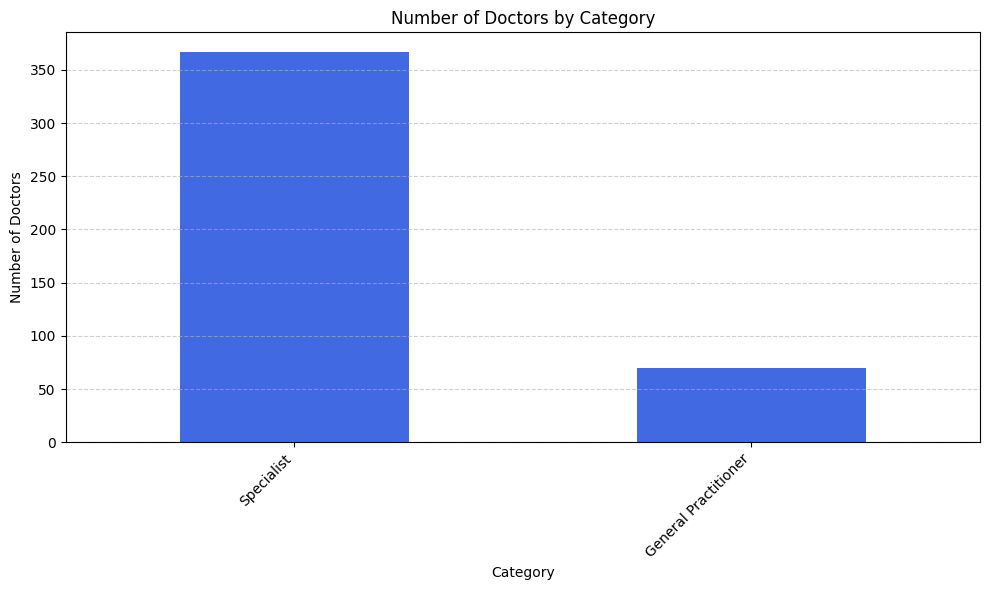

In [ ]:
n_doctor_per_category = merged_df['Category'].value_counts()
#bar chart
plt.figure(figsize=(10, 6))
n_doctor_per_category.plot(kind='bar', color='royalblue')
plt.title('Number of Doctors by Category')
plt.xlabel('Category')
plt.ylabel('Number of Doctors')
plt.xticks(rotation=45, ha='right')  #rotating category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()  #adjusting layout to prevent overlapping elements
plt.show()

In [ ]:
rank_counts = final_df.groupby('Rank')['DoctorID'].count()
#defining the mapping of rank names to custom labels
rank_labels = {
    1: "Ambassador",
    2: "Titanium Plus",
    3: "Titanium",
    4: "Platinum Plus",
    5: "Platinum",
    6: "Gold Plus",
    7: "Gold",
    8: "Silver Plus",
    9: "Silver"
}

rank_counts.index = [rank_labels.get(rank, rank) for rank in rank_counts.index]
df_plotly = pd.DataFrame({'Rank': rank_counts.index, 'Count': rank_counts.values})
fig = px.pie(df_plotly, values='Count', names='Rank', title='Distribution of Doctors Across Ranks', color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [ ]:
fig_bar_E = px.bar(final_df['Experience'].value_counts().reset_index(), x='index', y='Experience',
                 title='Frequency of Experience levels among doctors (Bar Plot)',
                 labels={'index': 'Experience', 'Experience': 'Frequency'})
fig_bar_E.show()

In [ ]:
fig_top10 = px.bar(final_df.sort_values(by='Orders_Quantity', ascending=False).head(10), x='DoctorID', y='Orders_Quantity',
             title='Top 10 Doctors with the Highest Number of Orders This Year',
             labels={'DoctorID': 'Doctor ID', 'Orders_Quantity': 'Oders Quantity This Year'})
fig_top10.show()

- Top 10 ordering doctors.

In [ ]:
fig = px.bar(final_df.sort_values(by='Total_Complaints', ascending=False).head(10), x='DoctorID', y='Total_Complaints',
             title='Top 10 Doctors with the Highest Number of Complaints',
             labels={'DoctorID': 'Doctor ID', 'Total_Complaints': 'Total Complaints'})
fig.show()

- Doctor with ID 11 has 19 compliants which is the highest among the others.

###Rework Rates

In [ ]:
fig_hist_ER = px.histogram(final_df, x='R rate', color='Experience',
                        title='R-rate Distribution by Experience Level (Histogram)',
                        labels={'R rate': 'R-rate', 'Experience': 'Experience Level'})
fig_hist_ER.show()

- 'Developing' doctors produce the highest level of reworks.
- 'Established' doctors produce the least demand of rework.
- 'Veteran' doctors have the lowest average of rework in terms of R rate.

###Instructions

Number of doctors with special instructions: 66
Percentage of doctors with special instructions: 15.10%


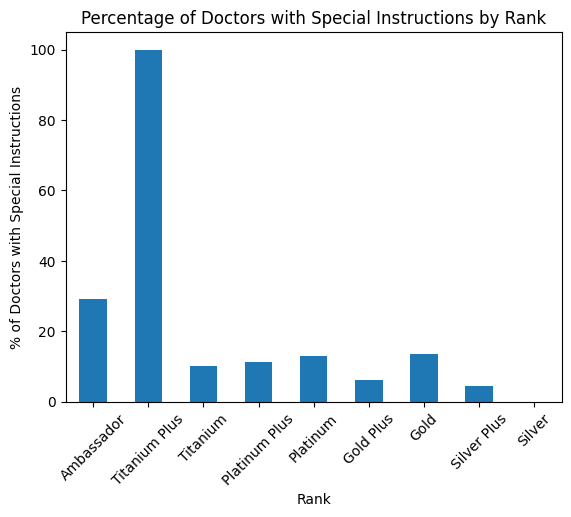

Total complaints with special instructions: 43.0
Total complaints without special instructions: 217.0
Average complaints with special instructions: 0.65
Average complaints without special instructions: 0.58
Doctors with special instructions tend to have more complaints on average.


In [ ]:
#defining the rank map
rank_map = {
    "Ambassador": 1,
    "Titanium Plus": 2,
    "Titanium": 3,
    "Platinum Plus": 4,
    "Platinum": 5,
    "Gold Plus": 6,
    "Gold": 7,
    "Silver Plus": 8,
    "Silver": 9
}

special_instructions_count = final_df['Instruction'].sum()
total_doctors = len(final_df)
percentage_special_instructions = (special_instructions_count / total_doctors) * 100

print(f"Number of doctors with special instructions: {special_instructions_count}")
print(f"Percentage of doctors with special instructions: {percentage_special_instructions:.2f}%")

#grouping by Rank and calculating the percentage of doctors with special instructions for each rank
rank_special_instructions = (final_df.groupby('Rank')['Instruction'].sum() / final_df.groupby('Rank')['DoctorID'].count()) * 100


rank_special_instructions.plot(kind='bar')
plt.xticks(range(len(rank_special_instructions)), rank_map.keys(), rotation=45)
plt.title('Percentage of Doctors with Special Instructions by Rank')
plt.xlabel('Rank')
plt.ylabel('% of Doctors with Special Instructions')
plt.show()

#analyzing the relationship between special instructions and complaints
complaints_with_special_instructions = final_df[final_df['Instruction'] == 1]['Total_Complaints'].sum()
complaints_without_special_instructions = final_df[final_df['Instruction'] == 0]['Total_Complaints'].sum()

print(f"Total complaints with special instructions: {complaints_with_special_instructions}")
print(f"Total complaints without special instructions: {complaints_without_special_instructions}")

#calculating the average number of complaints for each group
avg_complaints_with_special_instructions = complaints_with_special_instructions / special_instructions_count
avg_complaints_without_special_instructions = complaints_without_special_instructions / (total_doctors - special_instructions_count)

print(f"Average complaints with special instructions: {avg_complaints_with_special_instructions:.2f}")
print(f"Average complaints without special instructions: {avg_complaints_without_special_instructions:.2f}")

#comparing the average number of complaints for each group
if avg_complaints_with_special_instructions > avg_complaints_without_special_instructions:
    print("Doctors with special instructions tend to have more complaints on average.")
else:
    print("Doctors with special instructions tend to have fewer complaints on average.")

- Highest percentage of doctors with special instructions are of rank: Titanium Plus

### Complaints

In [ ]:
fig_hist_EC = px.histogram(final_df, x='Total_Complaints', color='Experience',
                        title='Total Complaints Distribution by Experience Level (Histogram)',
                        labels={'Total_Complaints': 'Total Complaints', 'Experience': 'Experience Level'})
fig_hist_EC.show()

In [ ]:
total_complaints = final_df[['correct_complaints', 'incorrect_complaints', 'unknown_complaints']].sum()
#calculating the percentage of doctors who have filed each type of complaint
percentage_doctors = (total_complaints / len(final_df)) * 100 #pandas series

complaints_data = {
    'Complaint_Type': total_complaints.index,
    'Percentage_Doctors': percentage_doctors.values
}
df_complaints = pd.DataFrame(complaints_data)
fig_pie = px.pie(df_complaints, values='Percentage_Doctors', names='Complaint_Type',
                  title='Percentage of Doctors by Complaint Type (Pie Chart)')
fig_pie.show()

In [ ]:
total_complaints_category = merged_df.groupby('Category')['Total_Complaints'].sum()
percentage_doctors_category = (total_complaints_category / total_complaints_category.sum()) * 100
#creating a DataFrame for Plotly
complaints_category_data = {
    'Category': total_complaints_category.index,
    'Percentage_Complaints': percentage_doctors_category.values
}
df_complaints_category = pd.DataFrame(complaints_category_data)
fig_pie_category = px.pie(df_complaints_category, values='Percentage_Complaints', names='Category',
                          title='Percentage of Complaints by Doctor Category (Pie Chart)')
fig_pie_category.show()

In [ ]:
final_df['Complaints_Exceed_Ordered'] = final_df['Total_Complaints'] - final_df['Orders_Quantity']
df_exceed = final_df[final_df['Complaints_Exceed_Ordered'] > 0]
fig_bar = px.bar(df_exceed, x='DoctorID', y='Complaints_Exceed_Ordered',
                 title='Customers where Total Complaints Exceed Total Ordered Items',
                 labels={'DoctorID': 'Doctor ID', 'Complaints_Exceed_Ordered': 'Excess Complaints'})
fig_bar.show()

In [ ]:
percentage_exceed = (len(df_exceed) / len(final_df)) * 100
print("Percentage of doctors whose total complaints exceed total items ordered:", percentage_exceed, "%")

Percentage of customers whose total complaints exceed total items ordered: 7.093821510297483 %


- 'Developing' doctors tend to complain more. (concerning issue as they have the highest average of purchases)
- 'Established' doctors have low proportion of complaints.
- 'Veteran' doctors have the LOWEST proportion of complaints.
- 57% of all recorded complaints were correct, 26% were falsely declared and 18% of all complaints status were unknown.
- 97% of all doctors who have made a complaint are `Specialists`.
- Some dotors have a total number of complaints more than the items they have ordered currently, this could probably be the case of multiple complaints on one item or complaints for the previously purchased items - 7.1%

### Orders VS Purchases

In [ ]:
fig_hist_RO = px.histogram(merged_df, x='Rank', y='Orders_Quantity',
                        title='Number of Orders by doctors ranks (Histogram)',
                        labels={'Rank': 'Rank Level', 'Orders_Quantity': 'Number of Orders'})
fig_hist_RO.show()

Doctors whose rank is "Ambassador" have the highest purchases this year.

In [ ]:
fig_hist_EO = px.histogram(final_df, x='Experience', y='Orders_Quantity',
                        title='Number of Orders by Experience Level (Histogram)',
                        labels={'Experience': 'Experience Level', 'Orders_Quantity': 'Number of Orders'})
fig_hist_EO.show()

- Only the doctors whose experience level a 'Developing' or 'Established' purchased from us.

- 'Developing' doctors have the highest average of purchases.

In [ ]:
fig_OP = go.Figure()
fig_OP.add_trace(go.Scatter(x=final_df['Orders_Quantity'], y=final_df['Purchases'], mode='markers',
                         marker=dict(color='blue', size=8, opacity=0.5),
                         ))
fig_OP.update_layout(title='Scatter Plot of Orders Quantity vs Purchases (Last Year)',
                  xaxis_title='Orders Quantity',
                  yaxis_title='Purchases (Last Year)',
                  showlegend=False)
fig_OP.show()

- Doctors with highest purchases last year have the lowest orders now.

In [ ]:
Developing_df = final_df[final_df['Experience'] == 'Developing']
fig_OP1 = go.Figure()
fig_OP1.add_trace(go.Scatter(x=Developing_df['Orders_Quantity'], y=Developing_df['Purchases'], mode='markers',
                         marker=dict(color='blue', size=8, opacity=0.5),
                         ))
fig_OP1.update_layout(title='Scatter Plot of Orders Quantity vs Purchases (Experience Level: Developing)',
                  xaxis_title='Orders Quantity',
                  yaxis_title='Purchases (Experience Level: Developing)',
                  showlegend=False)
fig_OP1.show()

- 'Developing' doctors have high purchases last year and moderately high orders this year.

In [ ]:
Established_df = final_df[final_df['Experience'] == 'Established']
fig_OP2 = go.Figure()
fig_OP2.add_trace(go.Scatter(x=Established_df['Orders_Quantity'], y=Established_df['Purchases'], mode='markers',
                         marker=dict(color='blue', size=8, opacity=0.5),
                         ))
fig_OP2.update_layout(title='Scatter Plot of Orders Quantity vs Purchases (Experience Level: Established)',
                  xaxis_title='Orders Quantity',
                  yaxis_title='Purchases (Experience Level: Established)',
                  showlegend=False)
fig_OP2.show()

- 'Established' doctors have made the moderately low amount of purchases last year and orders this year.

In [ ]:
Veteran_df = final_df[final_df['Experience'] == 'Veteran']
fig_OP3 = go.Figure()
fig_OP3.add_trace(go.Scatter(x=Veteran_df['Orders_Quantity'], y=Veteran_df['Purchases'], mode='markers',
                         marker=dict(color='blue', size=8, opacity=0.5),
                         ))
fig_OP3.update_layout(title='Scatter Plot of Orders Quantity vs Purchases (Experience Level: Veteran)',
                  xaxis_title='Orders Quantity',
                  yaxis_title='Purchases (Experience Level: Veteran)',
                  showlegend=False)
fig_OP3.show()

- 'Veteran' doctors have the least purchases last year and zero orders this year.

# **Model creation and data fitting**

##K-MEANS

In [ ]:
X = final_df.iloc[:, [0, 13]].to_numpy()

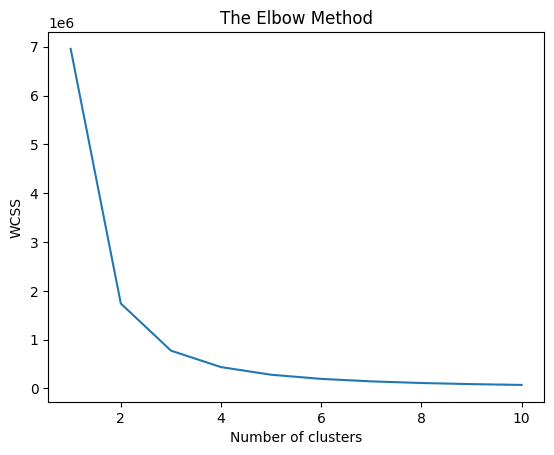

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 - Number of clusters is 3

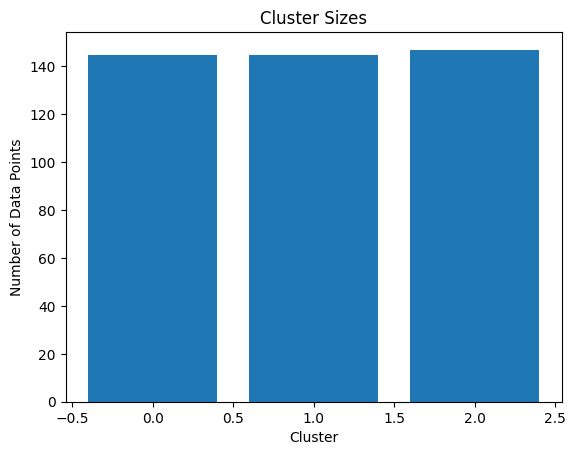

In [ ]:
#Therefore: K=3
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='random', max_iter=300, random_state=0)
kmeans.fit(X)

#visualizing cluster sizes
KMEANS_cluster_labels = kmeans.labels_
cluster_sizes = np.bincount(KMEANS_cluster_labels)
plt.bar(range(num_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.show()

In [ ]:
print(kmeans.cluster_centers_)

[[219.5          0.62328767]
 [364.5          0.48611111]
 [ 73.           0.57823129]]


In [ ]:
final_df['Experience']= label_encoder.fit_transform(final_df['Experience'])
final_df.drop(columns=['Region'], inplace=True)

- Labelled 'Experience' column to apply the model
- Dropped region as it is historically proven by the sales and customer support departments that region is not a good predictor of the number of purchases a doctor will make or their support needs.

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(final_df)
KMEANS_cluster_labels = kmeans.labels_

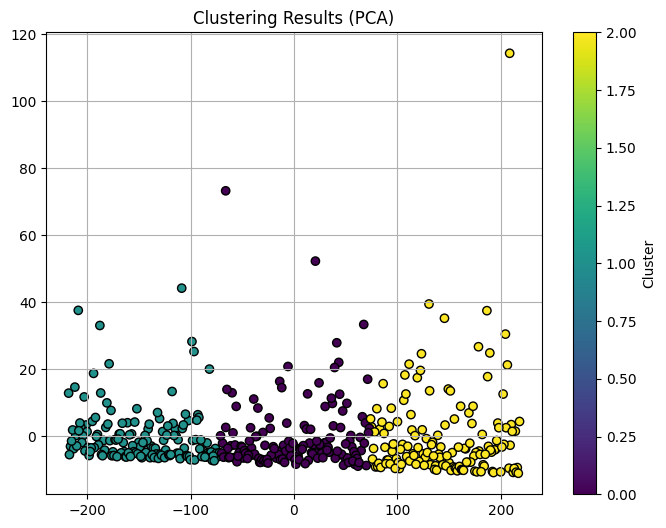

In [ ]:
#performing PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
x=final_df.copy()
reduced_features = pca.fit_transform(x)
clusters = kmeans.fit_predict(x)
data_with_clusters = final_df.copy()
data_with_clusters['Cluster'] = clusters

#scatter plot:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.title('Clustering Results (PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
final_df.head()

,DoctorID,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity,Complaints_Exceed_Ordered
0,109,1,1,49.0,0.90,1,49.0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,30,0,1,37.0,0.00,0,38.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,341,1,1,33.0,1.53,0,34.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,212,1,1,28.0,2.03,0,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,349,1,1,23.0,0.96,0,24.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_with_clusters.head()

,DoctorID,Category,Rank,Incidence rate,R rate,Experience,Purchases,Instruction,correct_complaints,incorrect_complaints,unknown_complaints,Total_Complaints,Orders_Quantity,Complaints_Exceed_Ordered,Cluster
0,109,1,1,49.0,0.90,1,49.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1
1,30,0,1,37.0,0.00,0,38.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,341,1,1,33.0,1.53,0,34.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,212,1,1,28.0,2.03,0,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,349,1,1,23.0,0.96,0,24.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2


- 'Cluster' column got saved in the dataframe.

In [ ]:
#calculating silhouette score
KMEANS_cluster_labelS = kmeans.labels_
silhouette_avg = silhouette_score(final_df, KMEANS_cluster_labels)
print("K-MEANS Silhouette Score:", silhouette_avg)

K-MEANS Silhouette Score: 0.5639909500759471


##DBSCAN

In [ ]:
#standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(final_df)
#PCA for dimensionality reduction (choosing 3 components for 3D)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(x_scaled)
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(pca_data)
DB_cluster_labels = dbscan.labels_
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = DB_cluster_labels
#(3D scatter plot)
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='DBSCAN Clustering Results (3D PCA)',
                    labels={'Cluster': 'Cluster Label'})
fig.show()

In [ ]:
#standardizing  the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(final_df)
#reducing to 2 dimensions for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(pca_data)
DB_cluster_labels = dbscan.labels_
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = DB_cluster_labels
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                  title='DBSCAN Clustering Results (With PCA)',
                  labels={'Cluster': 'Cluster Label'})
fig.show()

In [ ]:
silhouette_avg = silhouette_score(pca_data, DB_cluster_labels)
print("DBSCAN Silhouette Score (with potential noise impact):", silhouette_avg)

DBSCAN Silhouette Score (with potential noise impact): 0.5269228619380288


- From the silhoutte score of both the Kmeans and the DBSCAN It's obvious that the Kmeans score is the higher, therefore k-means model is better for our dataset.

# **Saving the KMeans clustering model and the data with cluster label**

In [ ]:
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [ ]:
data_with_clusters.to_csv("Clustered_doctors_Data.csv")

##Analyzing Clusters

In [ ]:
merged_df['Cluster'] = clusters
experience_mapping = {0: 'Developing', 1: 'Established', 2: 'Veteran'}
final_df['Experience'] = final_df['Experience'].replace(experience_mapping)
final_df['Cluster'] = clusters

In [ ]:
rank_cluster1_count = merged_df.groupby(['Cluster', 'Rank']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster1_count, x='Cluster', y='Rank', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Rank', 'Count'], title='Count of Doctors by Cluster and Rank')
fig.update_layout(xaxis_title='Cluster', yaxis_title='Rank')
fig.show()

In [ ]:
rank_cluster2_count = merged_df.groupby(['Cluster', 'Category']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster2_count, x='Cluster', y='Category', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Category', 'Count'], title='Count of Doctors by Cluster and Category')
fig.update_layout(xaxis_title='Cluster', yaxis_title='Category')
fig.show()

In [ ]:
rank_cluster3_count = final_df.groupby(['Cluster', 'Experience']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster3_count, x='Experience', y='Cluster', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Experience', 'Count'], title='Count of Doctors by Cluster and Experience')
fig.update_layout(xaxis_title='Experience', yaxis_title='Cluster')
fig.show()

In [ ]:
rank_cluster4_count = merged_df.groupby(['Cluster', 'Purchases']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster4_count, x='Purchases', y='Cluster', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Purchases', 'Count'], title='Count of Doctors by Cluster and Purchases')
fig.update_layout(xaxis_title='Purchases', yaxis_title='Cluster')
fig.show()

In [ ]:
rank_cluster5_count = merged_df.groupby(['Cluster', 'Orders_Quantity']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster5_count, x='Orders_Quantity', y='Cluster', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Orders_Quantity', 'Count'], title='Count of Doctors by Cluster and Orders Quantity')
fig.update_layout(xaxis_title='Orders Quantity', yaxis_title='Cluster')
fig.show()

In [ ]:
rank_cluster6_count = merged_df.groupby(['Cluster', 'R rate']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster6_count, x='R rate', y='Cluster', size='Count', color='Cluster',
                 hover_data=['Cluster', 'R rate', 'Count'], title='Count of Doctors by Cluster and R-rate')
fig.update_layout(xaxis_title='R rate', yaxis_title='Cluster')
fig.show()

In [ ]:
rank_cluster7_count = merged_df.groupby(['Cluster', 'Total_Complaints']).size().reset_index(name='Count')
fig = px.scatter(rank_cluster7_count, x='Total_Complaints', y='Cluster', size='Count', color='Cluster',
                 hover_data=['Cluster', 'Total_Complaints', 'Count'], title='Count of Doctors by Cluster and Total Complaints')
fig.update_layout(xaxis_title='Total_Complaints', yaxis_title='Cluster')
fig.show()

-- Cluster 0:
 * Name: Diverse Specialists

 *Characteristics:
* Contains a mix of Silver, Titanium Plus, and some Silver Plus doctors.
* Represents a diverse range of ranks.
* 67% are Specialists, with a significant proportion of Veterans.
* Majority of doctors are at the Developing experience level.
* Includes some of the top ordering doctors.
* Contains the top complaining doctor (ID=11).
* High percentage of doctors with special instructions (Titanium Plus).


<details>
<summary>Click to expand!</summary>

 * All Silver and Titanium plus, most Silver plus doctors belong to it
* It includes a certain number of doctors from each rank
* 67% are Specialists (26% of Specialists), 33% are General Practitioners (70% of General Practitioners)
* Most doctors are of experience level: Developing, 66% of Veterans belongs to this cluster
* Have some of the top 10 ordering doctors of this year
* Includes our top complaining doctor, ID=11
* High percentage of doctors with special instructions belong to this cluster (Titanium Pus) whome they tend to have more complaints on average
</details>


-- Cluster 1:
 * Name: High-End Specialists

 *Characteristics:
* Includes a large number of Ambassadors, Platinum, and Platinum Plus doctors.
* All doctors are Specialists, with a focus on high purchasing power.
* Majority of doctors are at the Developing experience level, with a notable proportion of Veterans.


<details>
<summary>Click to expand!</summary>

* Includes large number of Ambassador(41%): whome they have the highest purchases last year, most Platinum and Platinum plus doctors
* All of them are Specialists (39%): 97% of complaints are from Specialists
* Most doctors are of experience level: Developing, 34% of Veterans belongs to this cluster
</details>


-- Cluster 2:
 * Name: Established Gold Practitioners

 *Characteristics:
* Encompasses most Gold doctors.
* Majority of doctors are Established, with many having zero orders this year.
* 86% are Specialists.
* Contains doctors with the highest rework rate.
* Includes most of the top ordering doctors.


<details>
<summary>Click to expand!</summary>

* Includes a large number of Ambassadors, Platinum, and Platinum Plus doctors.
* Most Gold doctors belong to this cluster
* Most of Established doctors belongs to it: most of them -established doctors- have zero orders this year, large number of them is of experience level: Developing
* 86% are Specialists (34%), 14% are General Practitioners (30%)
* Contains doctors with the highest rework rate
* Have most of the top 10 ordering doctors of this year
</details>


(Non-ordering doctors for this year and non-complaining doctors are nearly equally distributed among the three clusters)

(Developing doctors are equally distributed among the 3 clusters, they have the highest number of purchases, rework and complaints)

# **Training and testing the model accuracy using decision tree**

In [ ]:
X=data_with_clusters.drop(['Cluster'],axis=1)
y=data_with_clusters[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Decision Tree

In [ ]:
model=DecisionTreeClassifier(criterion="entropy" , max_depth=3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy, '% Accuracy')

1.0 % Accuracy


- 100% accuracy, overfitting.

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  0  0]
 [ 0 30  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



- We only have three classes, a perfect F1 score [1. 1. 1.] for each class is more likely, especially with this small dataset.

In [ ]:
print(y_test['Cluster'].value_counts())

1    30
2    30
0    28
Name: Cluster, dtype: int64


- Data is balanced, which indicates a reliable F1 score interpretation, which means the perfect 1.0 for each class is a true reflection of the model's performance.

- Alternatives to avoid overfitting (taking into consideration: small dataset):
1. pruning the decision tree model
2. using random forest (less prone to overfitting than decision tree)
3. Logistic regression

##(Post) Pruning decision tree

-> Cost complexity pruning: this method uses a cost complexity parameter (ccp_alpha) to control the pruning process. Higher values of ccp_alpha lead to more aggressive pruning.

-  Using grid search CV to find the best ccp_alpha value for pruning (hyperparameter tuning):

In [ ]:
#defining the parameter grid for ccp_alpha
param_grid = {'ccp_alpha': [0.8, 1, 0.777, 0.97]}
model = DecisionTreeClassifier(criterion="entropy")

#setting up GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3) #using low number of cv (number of cross-validation folds used to evaluate the model during hyperparameter tuning) to avoid overfitting on this small dataset
grid_search.fit(X_train, y_train)
best_DecisionTree = grid_search.best_estimator_
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print(best_ccp_alpha)

#making predictions on the testing data using the best model
y_pred = best_DecisionTree.predict(X_test)

0.8


In [ ]:
#confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  0  0]
 [ 0 30  0]
 [30  0  0]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        28
           1       1.00      1.00      1.00        30
           2       0.00      0.00      0.00        30

    accuracy                           0.66        88
   macro avg       0.49      0.67      0.55        88
weighted avg       0.49      0.66      0.55        88



In [ ]:
accuracy_2 = accuracy_score(y_test, y_pred)
print(accuracy_2, ' Accuracy')

0.6590909090909091  Accuracy


- 65.9% Accuracy model is making some mistakes, but it's learning more generalizable patterns that apply to unseen examples.

##Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Raccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Raccuracy)

Accuracy: 0.625


- 62.5% accuracy.

##Logistic Regression

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

#Evaluating model
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8181818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.97      0.93      0.95        30
           2       0.76      0.83      0.79        30

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

Confusion Matrix:
[[19  1  8]
 [ 2 28  0]
 [ 5  0 25]]


- 81.8% accuracy.
- Logistic regression model is better to be saved and prepared for deployment.

# **Saving the logistic regression model for future classification**

In [ ]:
filename='final_model.sav'
pickle.dump(log_reg_model, open(filename, 'wb'))
loaded_model=pickle.load(open(filename, 'rb'))
result=loaded_model.score(X_test, y_test)
print(result*100, '% Accuracy')

81.81818181818183 % Accuracy
